In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm

# STudy data files
fitness_data_path = "data/25.xls"

# Read csv data file
fitness_df = pd.read_csv(fitness_data_path)

# Display the data table for preview
fitness_df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64


In [45]:
fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [44]:
#Checking for Null dataset
fitness_df.isnull().sum()

date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64

In [46]:
#Mapping numeric values to categories
mood_mapping = {300: "Happy", 200: "Neutral", 100: "Sad"}
activeness_mapping = {500: "Active", 0: "Inactive"}

#Convert numeric values to categories
fitness_df['mood_cat'] = fitness_df['mood'].map(mood_mapping)
fitness_df['active'] = fitness_df['bool_of_active'].map(activeness_mapping)

fitness_df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg,mood_cat,active
0,2017-10-06,5464,200,181,5,0,66,Neutral,Inactive
1,2017-10-07,6041,100,197,8,0,66,Sad,Inactive
2,2017-10-08,25,100,0,5,0,66,Sad,Inactive
3,2017-10-09,5461,100,174,4,0,66,Sad,Inactive
4,2017-10-10,6915,200,223,5,500,66,Neutral,Active
...,...,...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64,Sad,Inactive
92,2018-01-06,153,300,0,8,0,64,Happy,Inactive
93,2018-01-07,500,200,0,5,500,64,Neutral,Active
94,2018-01-08,2127,200,0,5,0,64,Neutral,Inactive


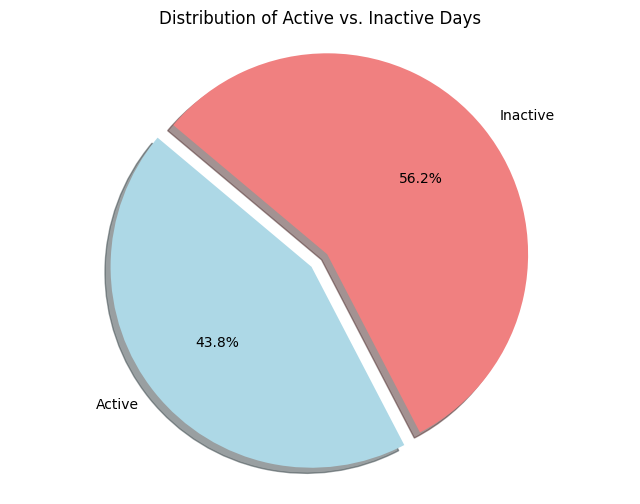

In [47]:
# Count the number of Active (500) and Inactive (0) days
active_count = (fitness_df['bool_of_active'] == 500).sum()
inactive_count = (fitness_df['bool_of_active'] == 0).sum()

# Create a pie chart with percentage labels
labels = ['Active', 'Inactive']
sizes = [active_count, inactive_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode Active slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Active vs. Inactive Days')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

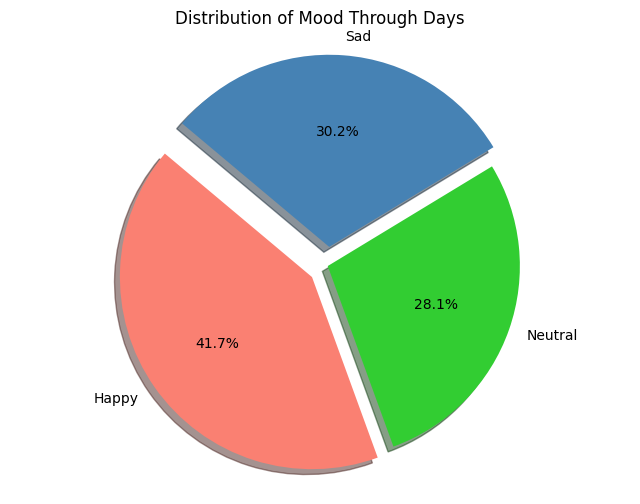

In [48]:
# Count the number of Happy (300), Neutral (200) and Sad (100) days
happy_days = (fitness_df['mood'] == 300).sum()
neutral_days = (fitness_df['mood'] == 200).sum()
sad_days = (fitness_df['mood'] == 100).sum()

# Create a pie chart with percentage labels
labels = ['Happy', 'Neutral', 'Sad']
sizes = [happy_days, neutral_days, sad_days]
colors = ['salmon', 'limegreen', 'steelblue']
explode = (0.1, 0, 0.1)  # explode Active slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Mood Through Days')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

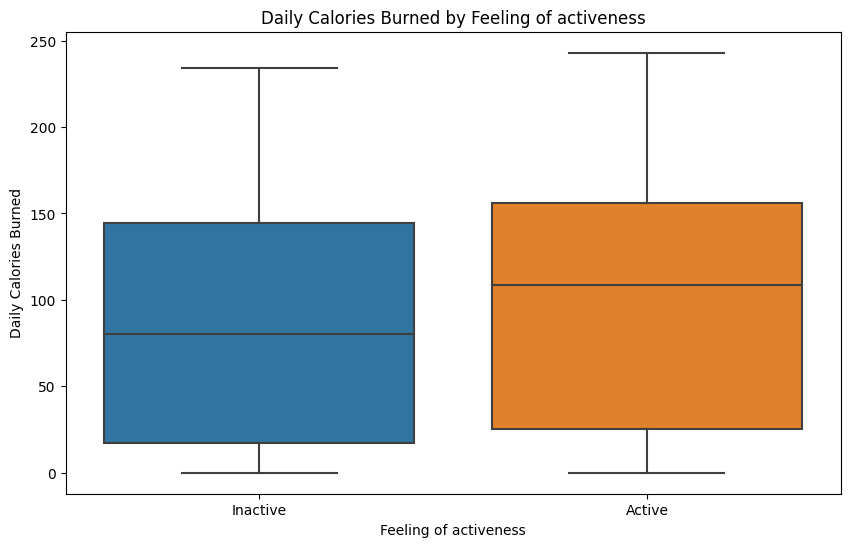

In [50]:

# Boxplot of Calories Burnt vs. Feeling of activeness
plt.figure(figsize=(10, 6))
sns.boxplot(x='active', y='calories_burned', data=fitness_df)
plt.title('Daily Calories Burned by Feeling of activeness')
plt.xlabel('Feeling of activeness')
plt.ylabel('Daily Calories Burned')
plt.show()

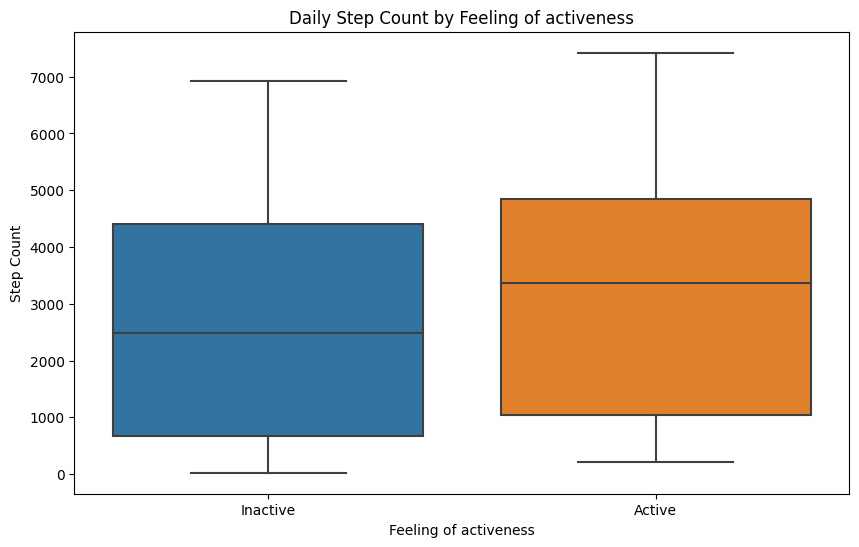

In [51]:
# Boxplot of Step Count vs. Feeling of activeness
plt.figure(figsize=(10, 6))
sns.boxplot(x='active', y='step_count', data=fitness_df)
plt.title('Daily Step Count by Feeling of activeness')
plt.xlabel('Feeling of activeness')
plt.ylabel('Step Count')
plt.show()

In [49]:
# T-test comparing Step Count between Active and Inactive groups
active_step_counts = fitness_df[fitness_df['active'] == 'Active']['step_count']
inactive_step_counts = fitness_df[fitness_df['active'] == 'Inactive']['step_count']
t_stat, p_value = st.ttest_ind(active_step_counts, inactive_step_counts)
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: 1.1740121459762678, p-value: 0.24335603679008008


In [52]:
from scipy.stats import pointbiserialr

#Correlation coefficient for Feel of Activeness and Step Count
# Select the binary and numeric variables
binary_step = fitness_df['bool_of_active']
numeric_step = fitness_df['step_count']

# Calculate Point-biserial correlation
correlation_step, p_value_step = pointbiserialr(binary_step, numeric_step)
print("Correlation coefficient between Feel of Avtiveness & Step Count")
print(f"Point-biserial correlation coefficient: {correlation_step}")
print(f"P-value: {p_value_step}")

#Correlation coefficient for Feel of Activeness and Caleries Burned
# Select the binary and numeric variables
binary_cal = fitness_df['bool_of_active']
numeric_cal = fitness_df['calories_burned']

# Calculate Point-biserial correlation
correlation_cal, p_value_cal = pointbiserialr(binary_cal, numeric_cal)
print("Correlation coefficient between Feel of Avtiveness & Calories Burned")
print(f"Point-biserial correlation coefficient: {correlation_cal}")
print(f"P-value: {p_value_cal}")

Correlation coefficient between Feel of Avtiveness & Step Count
Point-biserial correlation coefficient: 0.12021199123515082
P-value: 0.2433560367900791
Correlation coefficient between Feel of Avtiveness & Calories Burned
Point-biserial correlation coefficient: 0.11090006337772855
P-value: 0.2820692541453076


In [54]:
# Map bool_of_active to binary (0 or 1)
fitness_df['bool_of_active'] = fitness_df['bool_of_active'].map({0: 0, 500: 1})  # Update as per your actual mapping

# Define predictors and target variable
X = fitness_df[['step_count', 'calories_burned', 'hours_of_sleep']]
y = fitness_df['bool_of_active']

# Add constant to the predictors for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.668175
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         bool_of_active   No. Observations:                   96
Model:                          Logit   Df Residuals:                       92
Method:                           MLE   Df Model:                            3
Date:                Sun, 12 May 2024   Pseudo R-squ.:                 0.02501
Time:                        06:34:45   Log-Likelihood:                -64.145
converged:                       True   LL-Null:                       -65.790
Covariance Type:            nonrobust   LLR p-value:                    0.3489
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5382      0.821     -1.874      0.061      -3.147       0.071
step_count    